*Objective of this notebook is to model the data quickly and do various ML operations on data with different ML algorithms. It would be very useful in start of the competition to just look at how different models are performing with respect to each and with respect to different metrices, in order to plan a long term strategy for this competition.*

*I have also tested ensemble strategy with blends of different models in this notebook.*

*Before starting with this notebook, I would recommend to analyze the data and get some insights. Please refer to my notebook [Statistical Analysis: Univariate and Multivariate](https://www.kaggle.com/reverie5/statistical-analysis-univariate-multivariate) for the detailed analysis.*

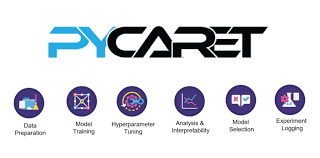

*Image Credit: Google Images*

*Kindly refer to pycaret documentation [**PyCaret Documentation**](https://pycaret.readthedocs.io/en/latest/)*
*Also, check the pycaret official tutorials [**PyCaret Tutorials**](https://pycaret.readthedocs.io/en/latest/tutorials.html)*

### If you found this notebook useful, Kindly upvote :)

#### What is PyCaret??
#### PyCaret is an open source, low code ML library through which we can do end to end ML experiments through very few lines of code.

### Installation, load libraries and read data

*Start by installing PyCaret*

In [93]:
# !pip install pycaret
# !pip install optuna

In [54]:
# Load libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

from pycaret.datasets import get_data
from pycaret.classification import *

In [73]:
# Load data in dataframes

train = pd.read_csv('TrainingWiDS2021.csv')
test  = pd.read_csv('UnlabeledWiDS2021.csv')
train.shape, test.shape


((130157, 181), (10234, 180))

In [74]:
train.head()

,Unnamed: 0,encounter_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,...,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,diabetes_mellitus
0,1,214826,118,68.0,22.732803,0,Caucasian,M,180.3,Floor,...,NaN,NaN,0,0,0,0,0,0,0,1
1,2,246060,81,77.0,27.421875,0,Caucasian,F,160.0,Floor,...,51.0,51.0,0,0,0,0,0,0,0,1
2,3,276985,118,25.0,31.952749,0,Caucasian,F,172.7,Emergency Department,...,NaN,NaN,0,0,0,0,0,0,0,0
3,4,262220,118,81.0,22.635548,1,Caucasian,F,165.1,Operating Room,...,337.0,337.0,0,0,0,0,0,0,0,0
4,5,201746,33,19.0,NaN,0,Caucasian,M,188.0,NaN,...,NaN,NaN,0,0,0,0,0,0,0,0


In [65]:
data_dictionary = pd.read_csv("DataDictionaryWiDS2021.csv")
unlabeled = pd.read_csv("UnlabeledWiDS2021.csv")
training = pd.read_csv("TrainingWiDS2021.csv")

del training['Unnamed: 0']
del unlabeled['Unnamed: 0']

column_datatype_mapping = dict(zip(data_dictionary['Variable Name'], data_dictionary['Data Type']))

all_data = training.append(unlabeled).drop(['encounter_id', 
                                            'hospital_id', 
                                            'diabetes_mellitus'], axis=1)

In [59]:
cat_cols = ['ethnicity', 'gender', 'hospital_admit_source',
           'icu_admit_source', 'icu_stay_type', 'icu_type',
           'apache_2_diagnosis', 'apache_3j_diagnosis','icu_id']

binary_cols = data_dictionary.loc[data_dictionary['Data Type'] == 'binary','Variable Name'].values
num_cols = data_dictionary.loc[data_dictionary['Data Type'] == 'numeric','Variable Name'].values


In [63]:
for col in all_data.columns:
    if col in cat_cols:
        all_data[col] = LabelEncoder().fit_transform(all_data[col].astype('str'))
        all_data[col]= all_data[col].astype('category')        
    elif col in binary_cols:
        pass
        #all_data[col] = all_data[col].fillna(-1)
    elif col in num_cols:
        pass
        #all_data[col] = all_data[col].fillna(all_data[col].median())
    else:
        print('other: ',col)
        #all_data[col] = all_data[col].fillna(all_data[col].median())

other:  bmi
other:  gcs_eyes_apache
other:  gcs_motor_apache
other:  gcs_verbal_apache


In [64]:
all_data

,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,icu_stay_type,...,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis
0,68.0,22.732803,0,2,1,180.3,10,1,244,0,...,NaN,NaN,NaN,0,0,0,0,0,0,0
1,77.0,27.421875,0,2,0,160.0,10,1,228,0,...,51.0,51.0,51.0,0,0,0,0,0,0,0
2,25.0,31.952749,0,2,0,172.7,9,0,252,0,...,NaN,NaN,NaN,0,0,0,0,0,0,0
3,81.0,22.635548,1,2,0,165.1,14,2,244,0,...,265.0,337.0,337.0,0,0,0,0,0,0,0
4,19.0,NaN,0,2,1,188.0,7,0,239,0,...,NaN,NaN,NaN,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10229,36.0,37.500000,0,2,0,170.1,10,1,326,0,...,NaN,NaN,NaN,0,0,0,0,0,0,0
10230,61.0,32.100000,0,2,0,160.0,9,0,326,0,...,NaN,NaN,NaN,0,0,0,0,0,0,0
10231,74.0,22.700000,0,2,0,165.1,6,1,326,0,...,NaN,NaN,NaN,0,0,0,0,0,0,0
10232,90.0,19.900000,0,2,0,160.0,9,0,326,0,...,NaN,NaN,NaN,0,0,0,0,0,0,0


In [75]:
df_train = all_data[:len(training)]
df_pred = all_data[len(training):].reset_index(drop=True)
Y = training['diabetes_mellitus']

train = df_train
train['diabetes_mellitus'] = Y

In [76]:
# check data
train.head()

,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,icu_stay_type,...,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,diabetes_mellitus
0,68.0,22.732803,0,Caucasian,M,180.3,Floor,Floor,92,admit,...,NaN,NaN,0,0,0,0,0,0,0,1
1,77.0,27.421875,0,Caucasian,F,160.0,Floor,Floor,90,admit,...,51.0,51.0,0,0,0,0,0,0,0,1
2,25.0,31.952749,0,Caucasian,F,172.7,Emergency Department,Accident & Emergency,93,admit,...,NaN,NaN,0,0,0,0,0,0,0,0
3,81.0,22.635548,1,Caucasian,F,165.1,Operating Room,Operating Room / Recovery,92,admit,...,337.0,337.0,0,0,0,0,0,0,0,0
4,19.0,NaN,0,Caucasian,M,188.0,NaN,Accident & Emergency,91,admit,...,NaN,NaN,0,0,0,0,0,0,0,0


### Preprocessing of dataset

In [117]:
# wids_clf = setup(data=train, 
#                     target='diabetes_mellitus',
#                     remove_multicollinearity = True,
#                      ignore_low_variance = True,
#                      fix_imbalance = True, 
#                     silent=True)

wids_classifier = setup(data=train, 
                    target='diabetes_mellitus')


,Description,Value
0,session_id,8198
1,Target,diabetes_mellitus
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(130157, 178)"
5,Missing Values,True
6,Numeric Features,154
7,Categorical Features,23
8,Ordinal Features,False
9,High Cardinality Features,False


### Comparing ML Models

*Using cross validation strategy, 3 folds, sorted by AUC score.*

In [118]:
# lets check what different models we have
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,pycaret.internal.tunable.TunableMLPClassifier,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [119]:
best_model = compare_models(fold =3, sort = 'AUC')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.8380,0.8648,0.4786,0.6771,0.5607,0.4651,0.4756,46.2700
lightgbm,Light Gradient Boosting Machine,0.8376,0.8614,0.4768,0.6760,0.5591,0.4632,0.4738,4.3733
xgboost,Extreme Gradient Boosting,0.8336,0.8548,0.4873,0.6545,0.5586,0.4588,0.4664,48.0067
gbc,Gradient Boosting Classifier,0.8297,0.8476,0.4271,0.6651,0.5201,0.4225,0.4378,43.3333
ada,Ada Boost Classifier,0.8170,0.8323,0.4067,0.6157,0.4898,0.3839,0.3962,8.6133
lda,Linear Discriminant Analysis,0.8149,0.8246,0.3319,0.6379,0.4366,0.3388,0.3647,2.2400
rf,Random Forest Classifier,0.8198,0.8220,0.3235,0.6729,0.4369,0.3450,0.3779,16.3600
et,Extra Trees Classifier,0.8131,0.8188,0.2419,0.6935,0.3586,0.2780,0.3312,13.2233
lr,Logistic Regression,0.8104,0.8162,0.2913,0.6336,0.3990,0.3043,0.3368,17.2800
nb,Naive Bayes,0.7324,0.7192,0.5021,0.4041,0.4476,0.2738,0.2767,0.3500


In [88]:
best_model = compare_models(fold =3, sort = 'AUC')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.8352,0.8578,0.4902,0.6615,0.5631,0.4643,0.4723,55.3900
lightgbm,Light Gradient Boosting Machine,0.8307,0.8526,0.4704,0.6510,0.5461,0.4453,0.4542,5.8033
xgboost,Extreme Gradient Boosting,0.8283,0.8485,0.4790,0.6383,0.5473,0.4440,0.4510,60.1867
gbc,Gradient Boosting Classifier,0.8186,0.8340,0.4879,0.5999,0.5381,0.4268,0.4303,65.8333
rf,Random Forest Classifier,0.8161,0.8214,0.3812,0.6237,0.4732,0.3696,0.3860,20.1433
et,Extra Trees Classifier,0.8125,0.8161,0.2635,0.6713,0.3784,0.2920,0.3365,14.9633
lr,Logistic Regression,0.7611,0.8150,0.7020,0.4658,0.5600,0.4051,0.4212,19.1933
lda,Linear Discriminant Analysis,0.7633,0.8113,0.6885,0.4685,0.5576,0.4039,0.4179,3.7100
ada,Ada Boost Classifier,0.7979,0.8054,0.5035,0.5357,0.5190,0.3912,0.3916,14.1467
knn,K Neighbors Classifier,0.6551,0.7000,0.6521,0.3439,0.4503,0.2327,0.2580,22.9900


In [120]:
# param = {'subsample': 1.0, 
#          'num_leaves': 10, 
#          'min_child_weight': 1, 
#          'max_depth': 6, 
#          'learning_rate': 0.1, 
#          'gamma': 1.5, 
#          'colsample_bytree': .6,
#          'n_estimators':1000,
#           'eval_metric':'auc',
#           'objective': 'binary:logistic'}

model = create_model('xgboost', fold = 3, early_stopping_rounds = 50, n_estimators=1000, 
                    subsample = 1.0, num_leaves = 10, min_child_weight = 1, max_depth = 6,
                    learning_rate = 0.1, gamma=1.5, colsample_bytree=0.6, eval_metric='auc',
                    objective = 'binary:logistic')


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8386,0.8638,0.4915,0.6733,0.5682,0.4719,0.4807
1,0.8348,0.8577,0.4692,0.6676,0.5511,0.4537,0.4642
2,0.8374,0.8610,0.4916,0.6680,0.5664,0.4692,0.4775
Mean,0.8369,0.8608,0.4841,0.6696,0.5619,0.4649,0.4742
SD,0.0016,0.0025,0.0105,0.0026,0.0077,0.0080,0.0071


In [129]:
# param = {'subsample': 1.0, 
#          'num_leaves': 10, 
#          'min_child_weight': 1, 
#          'max_depth': 6, 
#          'learning_rate': 0.1, 
#          'gamma': 1.5, 
#          'colsample_bytree': .6,
#          'n_estimators':1000,
#           'eval_metric':'auc',
#           'objective': 'binary:logistic'}

model = create_model('xgboost', fold = 3, early_stopping_rounds = 50, n_estimators=1000, 
                    subsample = 1.0, num_leaves = 10, min_child_weight = 1, max_depth = 6,
                    learning_rate = 0.1, gamma=1.5, colsample_bytree=0.6, eval_metric='auc',
                    objective = 'binary:logistic')


IntProgress(value=0, description='Processing: ', max=4)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,22:37:28
Status,. . . . . . . . . . . . . . . . . .,Searching Hyperparameters
Estimator,. . . . . . . . . . . . . . . . . .,Extreme Gradient Boosting


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC


ValueError: k-fold cross-validation requires at least one train/test split by setting n_splits=2 or more, got n_splits=1.

In [121]:
model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6,
              early_stopping_rounds=50, eval_metric='auc', gamma=1.5, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=-1, num_leaves=10, num_parallel_tree=1,
              objective='binary:logistic', random_state=8198, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1.0,
              tree_method='auto', use_label_encoder=True, validate_parameters=1, ...)

In [ ]:
tuned_model = tune_model(model, fold = 3, choose_better=True, n_iter=1000, search_library='optuna')

IntProgress(value=0, description='Processing: ', max=7)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,22:37:28
Status,. . . . . . . . . . . . . . . . . .,Searching Hyperparameters
Estimator,. . . . . . . . . . . . . . . . . .,Extreme Gradient Boosting


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC


[I 2021-01-25 22:37:28,602] Searching the best hyperparameters using 91109 samples...


### Create a specific ML model

*Although catboost is performing very good, but its taking so much time. Lets take lightgbm.*

*Version: 5 -> Trying catboost*

In [38]:
params = {'learning_rate':0.05,
          'num_leaves':30,
          'n_estimators':500,
          'metric': 'auc',
          'objective': 'binary',
          'scale_pos_weight': 2}

In [90]:
# Lets create a specific model
# model_lgbm = create_model('lightgbm', fold = 3, learning_rate = 0.05, num_leaves = 30, metric = 'auc', n_estimators = 500)
model_lgbm = create_model('lightgbm', fold = 3, learning_rate = 0.05, num_leaves = 30, metric = 'auc', n_estimators = 500)


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8347,0.8602,0.4783,0.6647,0.5563,0.4580,0.4674
1,0.8313,0.8574,0.4703,0.6540,0.5471,0.4469,0.4561
2,0.8346,0.8570,0.4770,0.6648,0.5555,0.4573,0.4668
Mean,0.8336,0.8582,0.4752,0.6612,0.5530,0.4541,0.4634
SD,0.0016,0.0014,0.0035,0.0051,0.0041,0.0051,0.0052


In [42]:
print(best_model)

In [95]:
tuned_model_lgbm_optuna = tune_model(model_lgbm, fold = 3, n_iter=250, optimize = 'AUC', search_library='optuna')


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8333,0.8599,0.4834,0.6565,0.5568,0.4571,0.4652
1,0.8328,0.8587,0.4753,0.6578,0.5518,0.4523,0.4613
2,0.8354,0.8587,0.4818,0.6658,0.5590,0.4610,0.4701
Mean,0.8338,0.8591,0.4802,0.6600,0.5559,0.4568,0.4655
SD,0.0011,0.0005,0.0035,0.0041,0.0030,0.0035,0.0036


In [96]:
tuned_model_lgbm = tune_model(model_lgbm, fold = 3, n_iter=250, optimize = 'AUC')


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8336,0.8597,0.4766,0.6604,0.5536,0.4546,0.4638
1,0.8309,0.8585,0.4636,0.6549,0.5429,0.4428,0.4528
2,0.8364,0.8580,0.4749,0.6737,0.5571,0.4605,0.4711
Mean,0.8336,0.8587,0.4717,0.6630,0.5512,0.4526,0.4625
SD,0.0023,0.0007,0.0058,0.0079,0.0061,0.0073,0.0075


In [97]:
tuned_model_lgbm

LGBMClassifier(bagging_fraction=0.9, bagging_freq=4, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.5,
               importance_type='split', learning_rate=0.094, max_depth=-1,
               metric='auc', min_child_samples=15, min_child_weight=0.001,
               min_split_gain=0.3, n_estimators=250, n_jobs=-1, num_leaves=30,
               objective=None, random_state=6155, reg_alpha=0.0005,
               reg_lambda=3, silent=True, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

In [98]:
tuned_model_lgbm_optuna

LGBMClassifier(bagging_fraction=0.9390739361517144, bagging_freq=7,
               boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               feature_fraction=0.5319474080944151, importance_type='split',
               learning_rate=0.06687031154084429, max_depth=-1, metric='auc',
               min_child_samples=11, min_child_weight=0.001,
               min_data_in_leaf=631, min_split_gain=0.346862105283312,
               n_estimators=232, n_jobs=-1, num_leaves=160, objective=None,
               random_state=6155, reg_alpha=0.0032296761905432647,
               reg_lambda=0.15009375600949215, silent=True, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

In [99]:
model_lgbm

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.05, max_depth=-1,
               metric='auc', min_child_samples=20, min_child_weight=0.001,
               min_split_gain=0.0, n_estimators=500, n_jobs=-1, num_leaves=30,
               objective=None, random_state=6155, reg_alpha=0.0, reg_lambda=0.0,
               silent=True, subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)

In [ ]:
# model_lgbm = create_model('lightgbm', fold = 3

### Model plots

*Here I'm going to plot auc curve for our model with train and validation sets.*

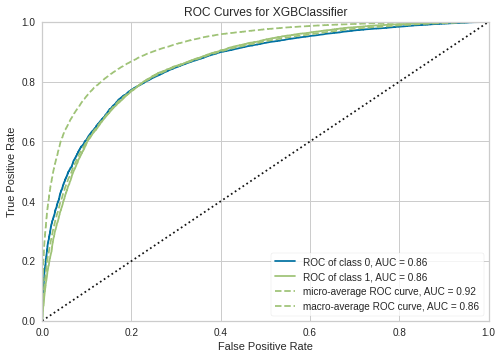

In [131]:
# Plotting auc curve
plot_model(model, plot = 'auc')

*Similary, we can plot different curves for model using plot_model function.*

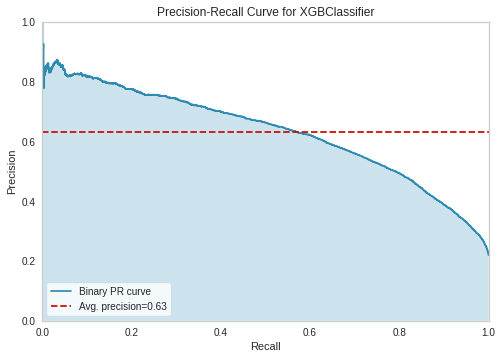

In [132]:
# Plotting precision recall curve
plot_model(model, plot='pr')

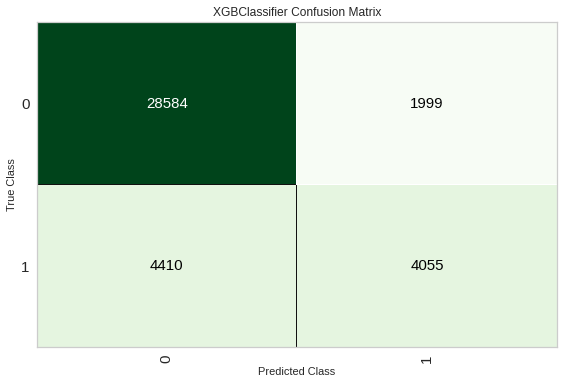

In [133]:
# Plotting confusion matrix
plot_model(model, plot='confusion_matrix')

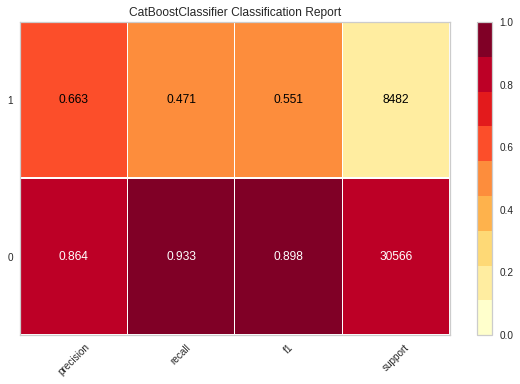

In [12]:
# Plotting classification report
plot_model(model, plot='class_report')

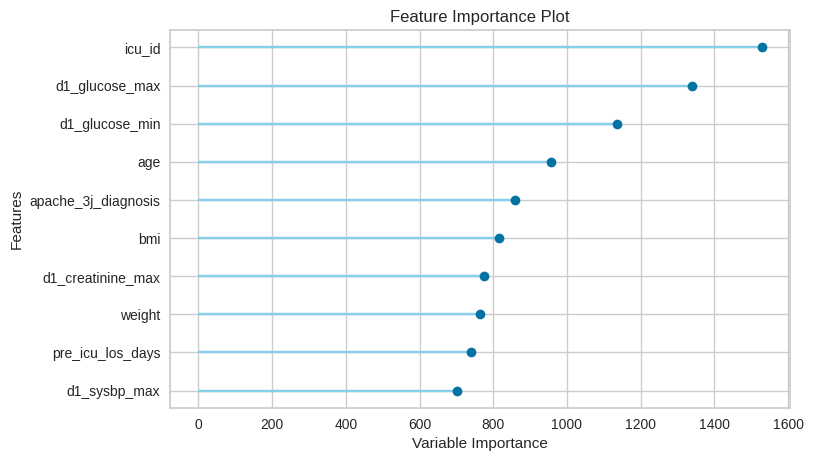

In [107]:
# Plotting feature importance
plot_model(tuned_model_lgbm_optuna, plot='feature')

### Model evaluation

*Instead of plotting different curves for model, we can simply use function evaluate_model to plot different curves. It internally uses plot_model.*

In [108]:
evaluate_model(tuned_model_lgbm_optuna)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

### Model Interpretation 

*This returns an Interpretation plot based on train and validation set. It basically gives us SHAP values.*

[Refer here: More on SHAP](https://shap.readthedocs.io/en/latest/)

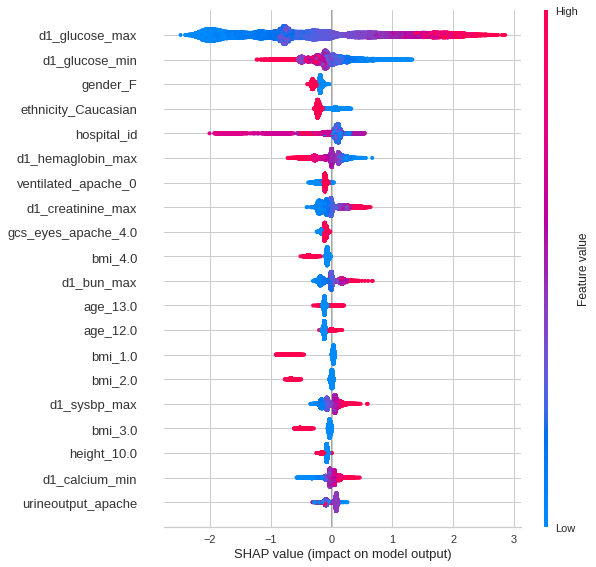

In [27]:
interpret_model(model)

### Save and load Model

*Trained and tuned model can be saved as pickle file and loaded later. It basically saves the transformation pipeline and model object.*

In [ ]:
# Save model

save_model(model, 'model_wids')

In [ ]:
# load model
# load_model('model_wids')

### Model Predictions

*Predicting on test dataset for submission purpose.*

In [84]:
# params = {'learning_rate':0.05,
#           'num_leaves':30,
#           'n_estimators':2000,
#           'metric': 'auc',
#           'objective': 'binary',
#           'scale_pos_weight': 2}

predict_model(model)


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.8381,0.8654,0.5011,0.6654,0.5716,0.4743,0.4815


,age,bmi,height,icu_id,pre_icu_los_days,weight,apache_2_diagnosis,apache_3j_diagnosis,fio2_apache,heart_rate_apache,...,gcs_verbal_apache_1.0,gcs_verbal_apache_2.0,gcs_verbal_apache_3.0,gcs_verbal_apache_4.0,gcs_verbal_apache_5.0,intubated_apache_0,ventilated_apache_0,diabetes_mellitus,Label,Score
0,71.000000,36.703602,152.000000,969.0,0.467361,84.800003,124.000000,306.010010,0.59665,122.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0,1,0.5316
1,67.000000,28.702444,157.500000,90.0,0.000694,71.199997,308.000000,1902.040039,0.59665,126.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0,0,0.9594
2,62.049023,24.286440,165.100006,559.0,0.063194,66.199997,303.000000,211.089996,1.00000,48.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0,0,0.9317
3,62.049023,21.088654,152.399994,979.0,0.188889,48.980000,307.000000,704.010010,0.59665,88.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0,0,0.9240
4,81.000000,20.989855,167.600006,212.0,0.131250,58.959999,305.000000,901.030029,0.59665,138.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0,0,0.8424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39043,54.000000,22.848795,185.000000,609.0,1.403472,78.199997,122.000000,703.020020,0.40000,39.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0,0,0.9834
39044,62.000000,28.978296,158.500000,1074.0,0.081944,72.800003,112.000000,107.010002,0.59665,103.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0,0,0.9627
39045,63.000000,43.988449,162.600006,133.0,1.788889,116.300003,303.000000,1301.010010,0.40000,55.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0,0.7796
39046,55.000000,32.330563,157.500000,290.0,0.846528,80.199997,185.328369,0.230000,0.59665,116.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0,0,0.8566


In [127]:
# preds = predict_model(tuned_model_lgbm_optuna, data = df_pred)
preds = predict_model(model, data = df_pred)
preds

,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,icu_stay_type,...,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,diabetes_mellitus,Label,Score
0,72.0,NaN,0,Caucasian,F,152.4,Floor,Accident & Emergency,82,admit,...,0,0,0,0,0,0,0,NaN,0,0.9537
1,86.0,NaN,0,Caucasian,F,175.3,Emergency Department,Accident & Emergency,82,admit,...,0,0,0,0,0,0,0,NaN,0,0.8859
2,72.0,NaN,0,Caucasian,F,162.6,Floor,Floor,82,admit,...,0,0,0,0,0,0,0,NaN,0,0.6507
3,66.0,NaN,0,Caucasian,M,177.8,Floor,Floor,82,admit,...,0,0,0,0,0,0,0,NaN,0,0.8427
4,89.0,NaN,0,Caucasian,M,170.2,Direct Admit,Accident & Emergency,82,admit,...,0,0,0,0,0,0,0,NaN,0,0.6386
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10229,36.0,37.5,0,Caucasian,F,170.1,Floor,Floor,1108,admit,...,0,0,0,0,0,0,0,NaN,0,0.9848
10230,61.0,32.1,0,Caucasian,F,160.0,Emergency Department,Accident & Emergency,1108,admit,...,0,0,0,0,0,0,0,NaN,0,0.9693
10231,74.0,22.7,0,Caucasian,F,165.1,Step-Down Unit (SDU),Floor,1108,admit,...,0,0,0,0,0,0,0,NaN,0,0.9280
10232,90.0,19.9,0,Caucasian,F,160.0,Emergency Department,Accident & Emergency,1108,admit,...,0,0,0,0,0,0,0,NaN,0,0.9923


In [128]:
# Submission
test['diabetes_mellitus'] = 1 - preds['Score']
test[["encounter_id","diabetes_mellitus"]].to_csv("submissions/submission_xgb_same_params.csv",index=False)

### Model Ensembling

*Blending is popular method of ensemble technique. The idea for blending is very simple. Its like taking into account the opinion of multiple models and come out with a single solution. Similar to voting.*

*In blending for classification problem, we take average of predicted probabilites by each model.*

*Example: preds_final = (preds_by_model1 + preds_by_model2 + preds_by_model3)/3*

In [ ]:
# We already have one model lightgbm (model), lets create two more models
xgboost = create_model('xgboost', fold =3)

In [ ]:
catboost = create_model('catboost', fold =3)

*Lets first combine lgbm and catboost for our first blend.*

In [ ]:
# Using blend function in pycaret
# model for lightgbm model
blended_model1 = blend_models(estimator_list = [model,catboost], method = 'soft', fold=3)

*Methods: Soft for predicted probabilites, Hard for labels (0,1)*

In [ ]:
# Check plots for blended model
# Plotting auc curve
plot_model(blended_model1, plot = 'auc')

*Now lets prepare a second blend using 3 model, catboost, lightgbm and xgboost.*

In [ ]:
blended_model2 = blend_models(estimator_list = [model,catboost, xgboost], method = 'soft', fold=3)

In [ ]:
# Check plots for blended model
# Plotting auc curve
plot_model(blended_model2, plot = 'auc')

### Predicting on test data using blended models

*Lets predict from unseen test data from blended model for submission*

In [ ]:
preds_blend1 = predict_model(blended_model1, data= test)
# Submission
test['diabetes_mellitus'] = 1 - preds_blend1['Score']
test[["encounter_id","diabetes_mellitus"]].to_csv("submission_blend1.csv",index=False)

In [ ]:
preds_blend2 = predict_model(blended_model2, data= test)
# Submission
test['diabetes_mellitus'] = 1 - preds_blend2['Score']
test[["encounter_id","diabetes_mellitus"]].to_csv("submission_blend2.csv",index=False)

*I will keep updating this notebook to include more useful techniques.*

### Thank you.